# 6.5 Unsupervised Machine Learning

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler #imports Scaler function

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#defining path and importing dataframe
path = r'C:\Users\april\Analyzing University Student Retention and Future Success'

df = pd.read_csv(os.path.join(path, 'Data', 'data_checked.csv'))

In [4]:
df.shape

(4424, 37)

In [5]:
df.head()

,Unnamed: 0,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,1,15,1,9254,1,1,160.0,1,1,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,3,1,17,2,9773,1,1,122.0,1,38,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,4,2,39,1,8014,0,1,100.0,1,37,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [6]:
df_nozeros = df[
    (df["Curricular units 1st sem (grade)"] != 0) &
    (df["Curricular units 2nd sem (grade)"] != 0)
]

In [7]:
df_nozeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3512 entries, 1 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      3512 non-null   int64  
 1   Marital Status                                  3512 non-null   int64  
 2   Application mode                                3512 non-null   int64  
 3   Application order                               3512 non-null   int64  
 4   Course                                          3512 non-null   int64  
 5   Daytime/evening attendance                      3512 non-null   int64  
 6   Previous qualification                          3512 non-null   int64  
 7   Previous qualification (grade)                  3512 non-null   float64
 8   Nacionality                                     3512 non-null   int64  
 9   Mother's qualification                        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4424 non-null   int64  
 1   Marital Status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance                      4424 non-null   int64  
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nacionality                                     4424 non-null   int64  
 9   Mother's qualification                   

In [9]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

In [10]:
columns=df.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['Unnamed: 0',
 'Marital Status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',


In [12]:
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=columns) #run the scaler on your df to a new 'df_scaled'
df_scaled.head() #show scaled df

,Unnamed: 0,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-1.731659,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-1.730876,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-1.730093,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-1.729310,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,-1.728527,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199


## The Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
# Select only numeric columns for clustering
df_cluster = df_nozeros.select_dtypes(include='number')

In [15]:
# Now fit KMeans using only the numeric columns
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))]

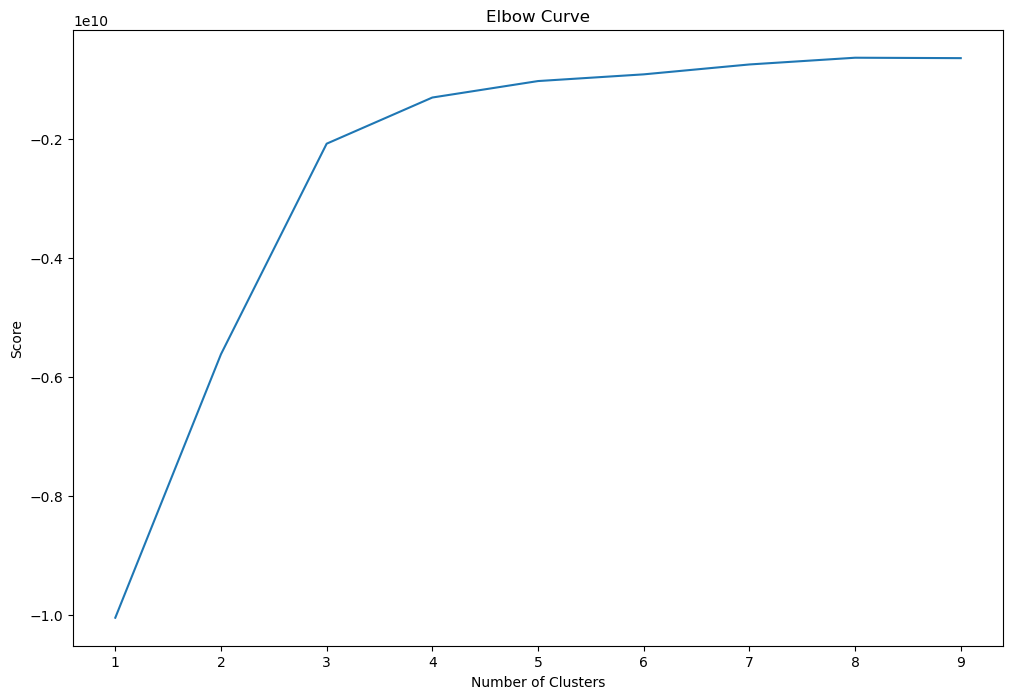

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Based on the elbow curve, the best number of clusters is 3 becasue after 3 the curve straightens out. 

## K-mean clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [18]:
# Step 1: Select only numeric columns
df_cluster = df_nozeros.select_dtypes(include='number')

# Step 2: Initialize and fit KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # adjust cluster number as needed
kmeans.fit(df_cluster)

KMeans(n_clusters=5, random_state=42)

In [19]:
# Step 1: Filter numeric columns from your cleaned df
df_numeric = df_nozeros.select_dtypes(include='number').copy()

# Optional: Reset index in case it got messed up from earlier filtering
df_numeric.reset_index(drop=True, inplace=True)
df_nozeros.reset_index(drop=True, inplace=True)

# Step 2: Scale numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 3: KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Step 4: Assign cluster labels back to original df_nozeros
df_nozeros['clusters'] = cluster_labels

C:\Users\april\AppData\Local\Temp\ipykernel_8684\1007692195.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nozeros['clusters'] = cluster_labels


In [20]:
df_nozeros.head()

,Unnamed: 0,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,clusters
0,1,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
1,3,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
2,4,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
3,5,2,39,1,9991,0,19,133.1,1,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,2
4,6,1,1,1,9500,1,1,142.0,1,19,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,0


In [21]:
df_nozeros['clusters'].value_counts()

clusters
0    2369
2     901
1     242
Name: count, dtype: int64

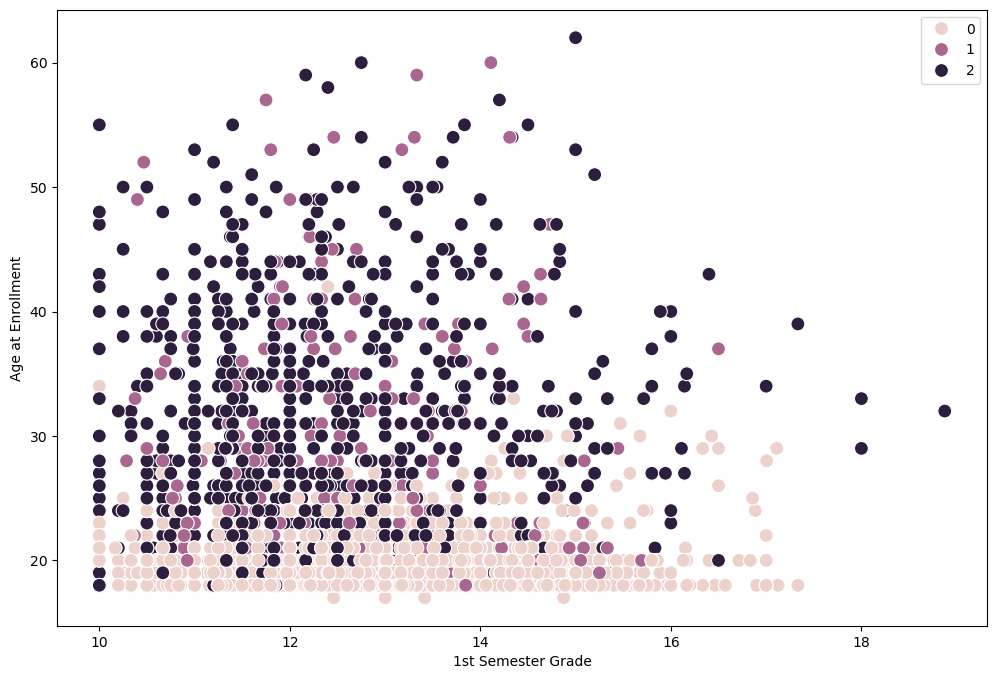

In [22]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros['Curricular units 1st sem (grade)'], y=df_nozeros['Age at enrollment'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('1st Semester Grade') # Label x-axis.
plt.ylabel('Age at Enrollment') # Label y-axis.
#Save fig
plt.savefig(r'C:\Users\april\Analyzing University Student Retention and Future Success\Visualizations\agevs1stsemester_cluster.png')

plt.show()

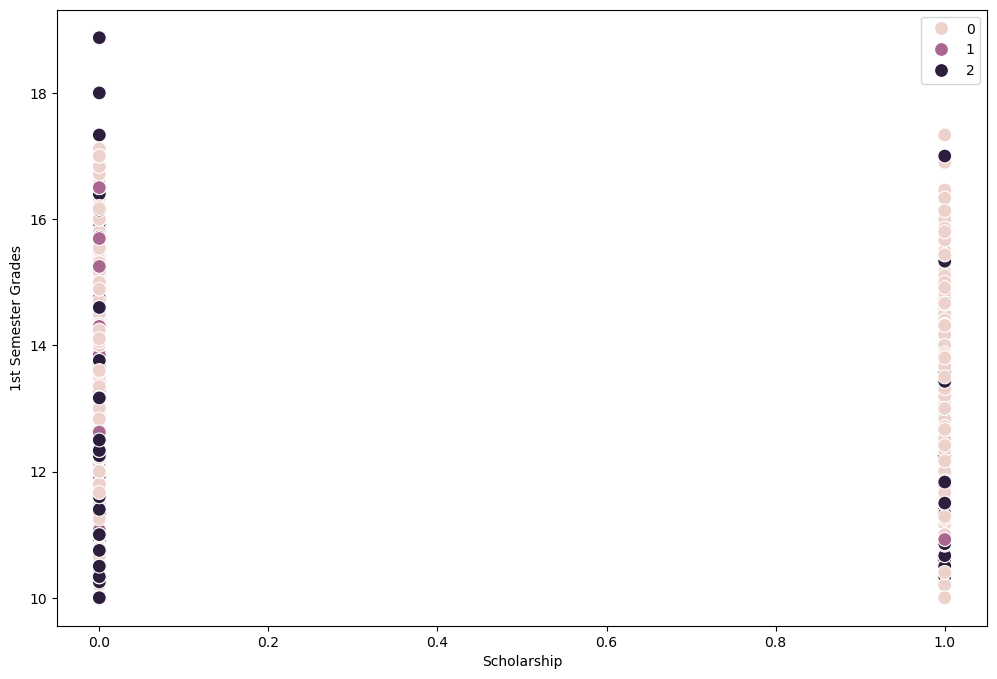

In [55]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros['Scholarship holder'], y=df_nozeros['Curricular units 1st sem (grade)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Scholarship') # Label x-axis.
plt.ylabel('1st Semester Grades') # Label y-axis.
plt.show()

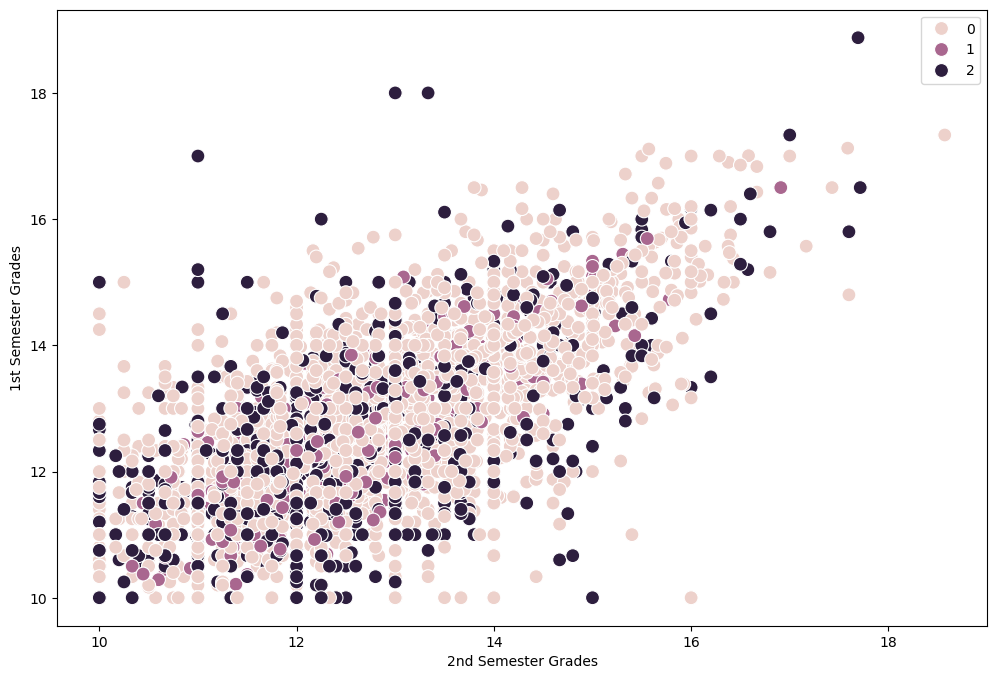

In [56]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros['Curricular units 2nd sem (grade)'], y=df_nozeros['Curricular units 1st sem (grade)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('2nd Semester Grades') # Label x-axis.
plt.ylabel('1st Semester Grades') # Label y-axis.
plt.show()

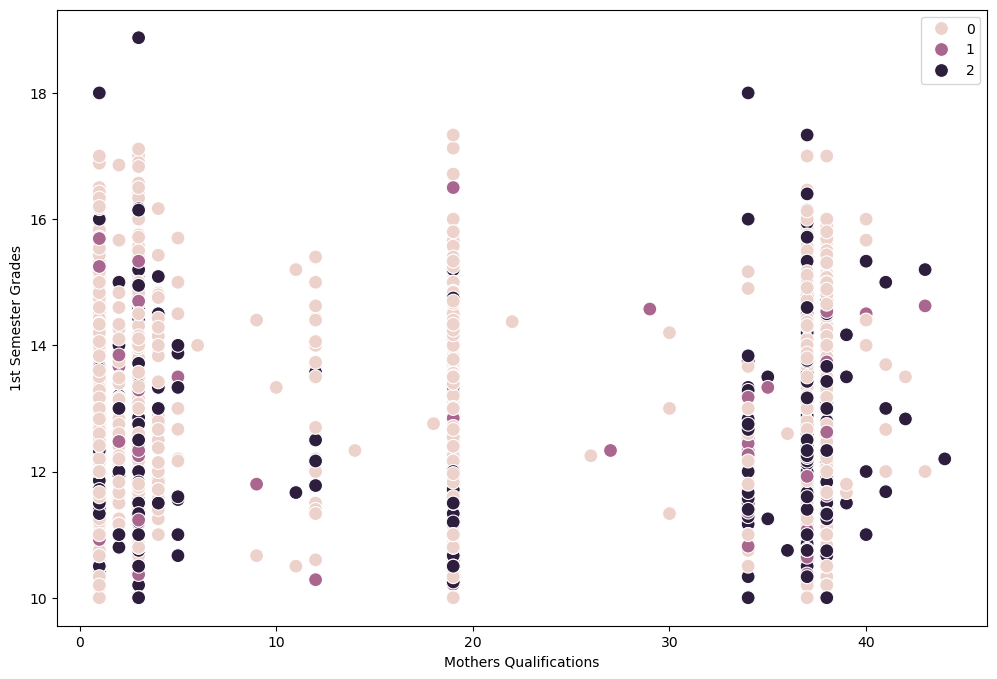

In [57]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros["Mother's qualification"], y=df_nozeros['Curricular units 1st sem (grade)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Mothers Qualifications') # Label x-axis.
plt.ylabel('1st Semester Grades') # Label y-axis.
plt.show()

<Figure size 1200x800 with 0 Axes>

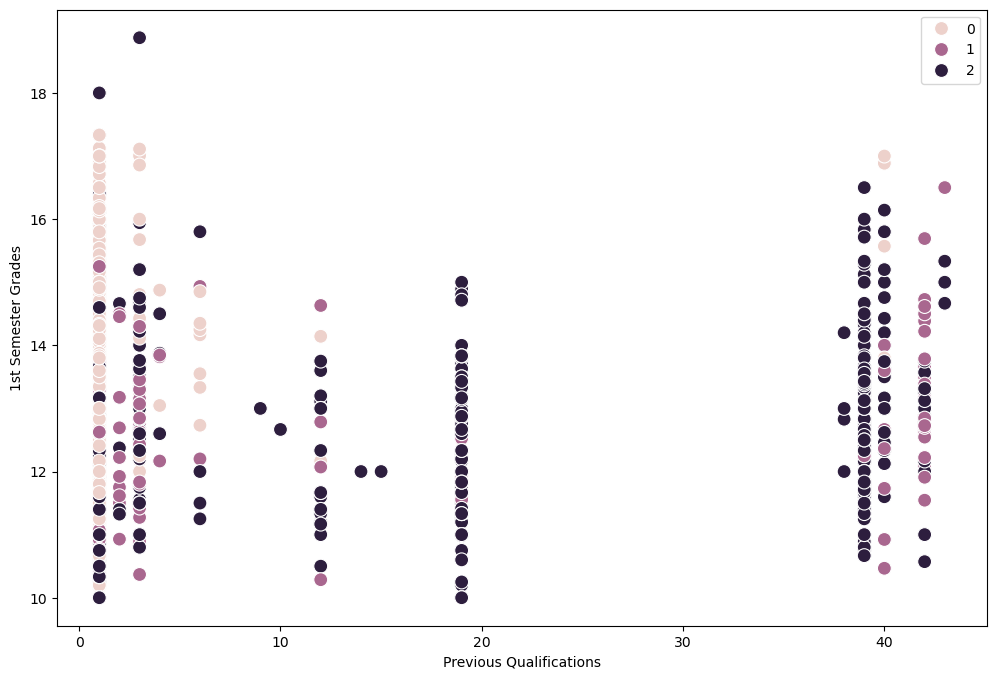

In [62]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros['Previous qualification'], y=df_nozeros['Curricular units 1st sem (grade)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Previous Qualifications') # Label x-axis.
plt.ylabel('1st Semester Grades') # Label y-axis.
plt.show()

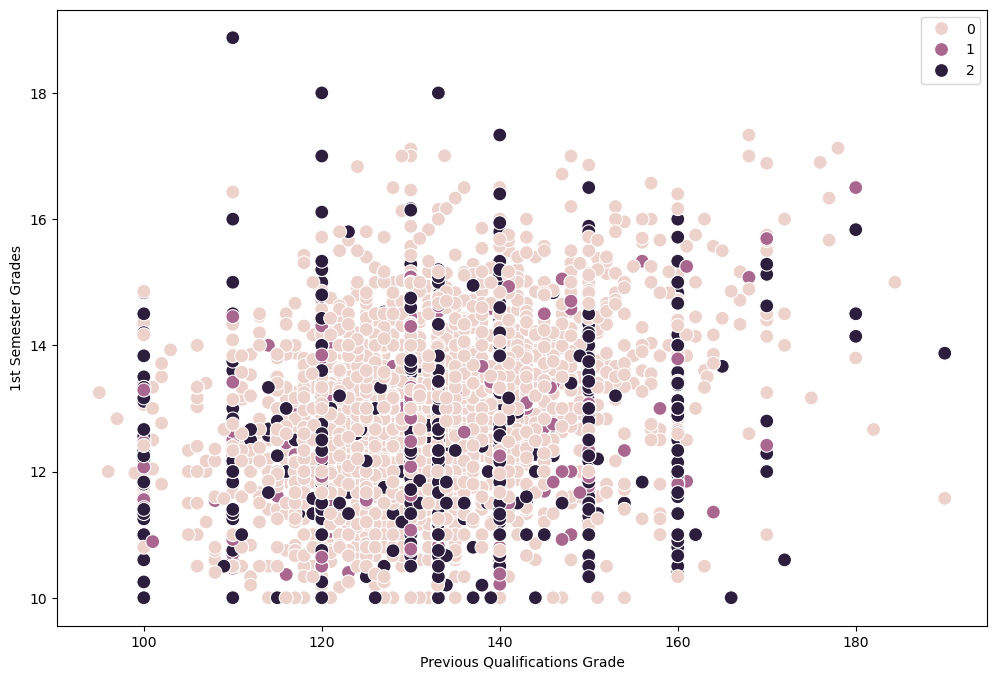

In [23]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros['Previous qualification (grade)'], y=df_nozeros['Curricular units 1st sem (grade)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Previous Qualifications Grade') # Label x-axis.
plt.ylabel('1st Semester Grades') # Label y-axis.

#Save fig
plt.savefig(r'C:\Users\april\Analyzing University Student Retention and Future Success\Visualizations\1stsemestervsPreviousQualgrade_cluster.png')

plt.show()

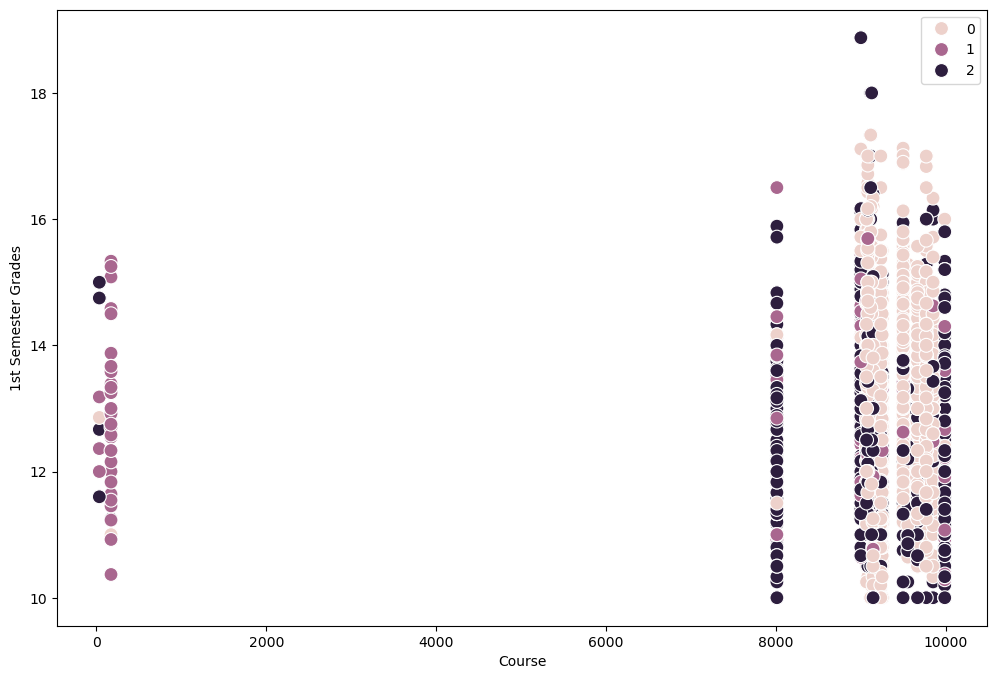

In [64]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros['Course'], y=df_nozeros['Curricular units 1st sem (grade)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Course') # Label x-axis.
plt.ylabel('1st Semester Grades') # Label y-axis.
plt.show()

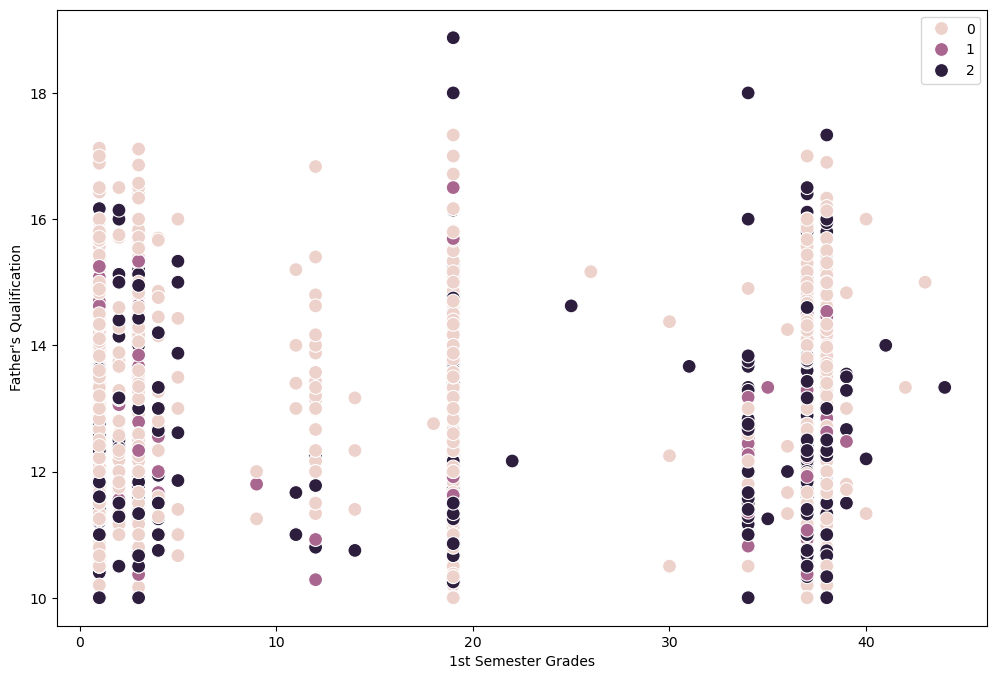

In [68]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_nozeros["Father's qualification"], y=df_nozeros['Curricular units 1st sem (grade)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('1st Semester Grades') # Label x-axis.
plt.ylabel("Father's Qualification") # Label y-axis.
plt.show()

In [59]:
# Assign color labels to each cluster
df_nozeros.loc[df_nozeros['clusters'] == 2, 'cluster'] = 'dark purple'
df_nozeros.loc[df_nozeros['clusters'] == 1, 'cluster'] = 'purple'
df_nozeros.loc[df_nozeros['clusters'] == 0, 'cluster'] = 'pink'

In [60]:
df.groupby('cluster').agg({'Curricular units 1st sem (grade)':['mean', 'median'], 
                         "Mother's qualification":['mean', 'median'], 
                         'Curricular units 2nd sem (grade)':['mean', 'median'],
                          'Scholarship holder':['mean', 'median'],
                          'Age at enrollment':['mean', 'median']})


Curricular units 1st sem (grade)             \
                                        mean     median   
cluster                                                   
dark purple                        12.731812  12.666667   
pink                               10.089933  11.875000   
purple                              2.156633   0.000000   

            Mother's qualification        Curricular units 2nd sem (grade)  \
                              mean median                             mean   
cluster                                                                      
dark purple              19.405013   19.0                        12.601022   
pink                     16.450980   19.0                         9.614551   
purple                   20.385151   19.0                         0.610093   

                       Scholarship holder        Age at enrollment         
                median               mean median              mean median  
cluster                                                                    
dark purple  12.666667           0.284534    0.0         22.617773   20.0  
pink         12.000000           0.333333    0.0         20.666667   19.0  
purple        0.000000           0.096288    0.0         26.055684   23.0

## The K-Means clustering analysis revealed three distinct student groups with unique academic and demographic patterns. The dark purple cluster includes the youngest students (median age 19) with the lowest academic performance (median grades of 0) and lower maternal education levels. This group may face structural disadvantages and would benefit from targeted academic support.

## The pink and purple clusters performed significantly better, with higher grades and older ages at enrollment. The purple group also had the highest maternal education levels, suggesting a potential link between parental education and student success. While scholarship rates were consistent across groups, financial aid alone does not explain academic differences. These insights highlight the need for equitable interventions while considering potential data bias—such as underreported socioeconomic factors—that may influence student outcomes.

In [69]:
df_nozeros.to_csv("student_dropout_nozeros_clusters.csv", index=False)